# Canny Edge Detector

### Om Shri Prasath EE17B113

In [1]:
# Importing required libraries

import numpy as np
import scipy.stats as st
import scipy.signal as sg
import matplotlib.pyplot as plt
import cv2

import warnings

warnings.filterwarnings("ignore")

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Canny Edge Detector


class CannyEdgeDetector:
    def __init__(self, gauss_size=3, gauss_sig=1.5, show_outputs=True):

        self.gauss_size = gauss_size
        self.gauss_sig = gauss_sig
        self.show_outputs = show_outputs

    def detect_edges(self, img):

        # Converting image to grayscale

        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        if self.show_outputs:
            plt.title("Grayscale Image")
            plt.imshow(img_gray, cmap="gray")
            plt.axis("off")
            plt.show()

        # Creating Gaussian Filter

        x = np.linspace(-self.gauss_sig, self.gauss_sig, self.gauss_size + 1)
        gauss_1d = np.diff(st.norm.cdf(x))
        gauss_2d = np.outer(gauss_1d, gauss_1d)
        gauss_kernel = gauss_2d / gauss_2d.sum()

        # Convolving the filter

        img_fil = sg.convolve2d(img_gray, gauss_kernel, mode="same", boundary="symm")

        if self.show_outputs:
            plt.title("Grayscale Image Gaussian Filtered")
            plt.axis("off")
            plt.imshow(img_fil, cmap="gray")
            plt.show()

        # Creating Sobel filter

        kern_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float)
        kern_v = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float)

        # Finding derivative using Sobel filters

        img_gx = sg.convolve2d(img_fil, kern_h, mode="same", boundary="symm")
        img_gy = sg.convolve2d(img_fil, kern_v, mode="same", boundary="symm")

        if self.show_outputs:
            plt.title("Gradient X")
            plt.imshow(img_gx, cmap="gray")
            plt.axis("off")
            plt.show()

            plt.title("Gradient Y")
            plt.imshow(img_gy, cmap="gray")
            plt.axis("off")
            plt.show()

        # Finding magnitude and angle

        ## Magnitude
        img_mag = np.hypot(img_gx, img_gy)
        img_mag *= 255 / img_mag.max()
        ## Angle
        img_ang = np.arctan2(img_gy, img_gx) * 180 / np.pi
        img_ang[img_ang < 0] += 180

        if self.show_outputs:
            plt.title("Magnitude")
            plt.imshow(img_mag, cmap="gray")
            plt.axis("off")
            plt.show()

            # Displaying Direction using HSV Representation (H => Angle and V => Magnitude (Saturation = 255)

            img_ang_disp = np.dstack(
                [
                    np.round(img_ang),
                    255 * np.ones(img_ang.shape, dtype=np.uint8),
                    np.round(img_mag),
                ]
            ).astype(np.uint8)

            img_ang_disp = cv2.cvtColor(img_ang_disp, cv2.COLOR_HSV2RGB)

            plt.title("Direction")
            plt.imshow(img_ang_disp)
            plt.axis("off")
            plt.show()

        # Non-Maximum Supression

        img_mag_max = np.zeros(img_mag.shape)

        ## Iterating through magnitude image
        for i in range(img_mag.shape[0]):
            for j in range(img_mag.shape[1]):

                ## Defining pixel magnitude in direction of gradient

                p = 255
                q = 255

                ## Assigning the pixel magnitude value

                if (0 <= img_ang[i, j] < 22.5) or (157.5 <= img_ang[i, j] <= 180):

                    if j > 0:
                        p = img_mag[i, j - 1]

                    if j < img_ang.shape[1] - 1:
                        q = img_mag[i, j + 1]

                elif 22.5 <= img_ang[i, j] < 67.5:

                    if i < img_ang.shape[0] - 1 and j > 0:
                        p = img_mag[i + 1, j - 1]

                    if i > 0 and j < img_ang.shape[1] - 1:
                        q = img_mag[i - 1, j + 1]

                elif 67.5 <= img_ang[i, j] < 112.5:

                    if i < img_ang.shape[0] - 1:
                        p = img_mag[i + 1, j]

                    if i > 0:
                        q = img_mag[i - 1, j]

                elif 112.5 <= img_ang[i, j] < 157.5:

                    if i < img_ang.shape[0] - 1 and j < img_ang.shape[1] - 1:
                        p = img_mag[i + 1, j + 1]

                    if i > 0 and j > 0:
                        q = img_mag[i - 1, j - 1]

                if img_mag[i, j] >= p and img_mag[i, j] >= q:
                    img_mag_max[i, j] = img_mag[i, j]

        if self.show_outputs:
            plt.title("Non Max Supression Output")
            plt.axis("off")
            plt.imshow(img_mag_max, cmap="gray")
            plt.show()

        # Single Thresholding

        median = np.median(img_mag)
        img_mag_max[img_mag_max < median] = 0
        img_mag_max[img_mag_max >= median] = 255

        return img_mag_max

<IPython.core.display.Javascript object>

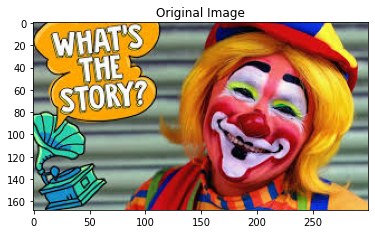

<IPython.core.display.Javascript object>

In [3]:
# Loading the image

img = cv2.imread("./clown.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.title("Original Image")
plt.imshow(img)
plt.show()

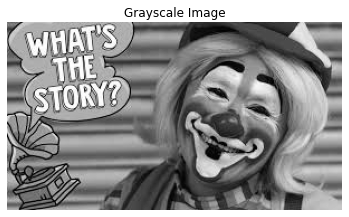

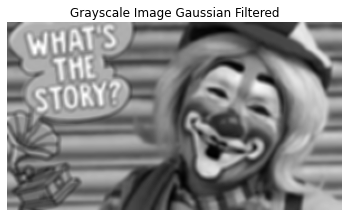

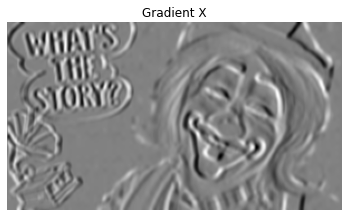

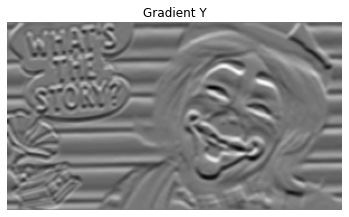

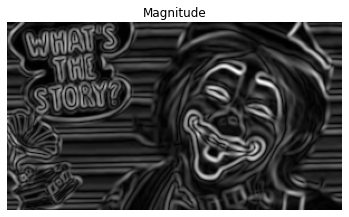

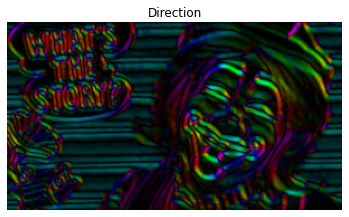

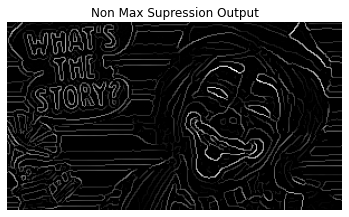

<IPython.core.display.Javascript object>

In [4]:
# Creating a Canny Edge Detector with Kernel Size = 5 and Sigma = 1.5

canny_edge_5 = CannyEdgeDetector(5, 1.5)

# Detecting edges

img_canny_5 = canny_edge_5.detect_edges(img)

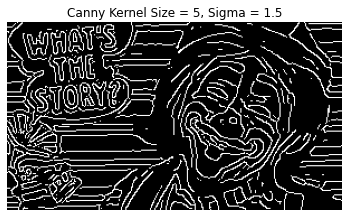

<IPython.core.display.Javascript object>

In [5]:
# Visualizing the Image

plt.title("Canny Kernel Size = 5, Sigma = 1.5")
plt.axis("off")
plt.imshow(img_canny_5, cmap="gray")
plt.show()

In [6]:
# Creating a Canny Edge Detector with Kernel Size = 5 and Sigma = 3

canny_edge_5_3 = CannyEdgeDetector(5, 3, False)

# Detecting edges

img_canny_5_3 = canny_edge_5_3.detect_edges(img)

<IPython.core.display.Javascript object>

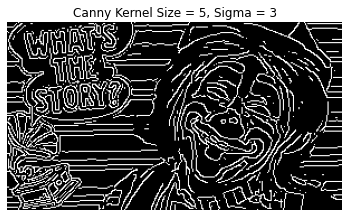

<IPython.core.display.Javascript object>

In [7]:
# Visualizing the Image

plt.title("Canny Kernel Size = 5, Sigma = 3")
plt.imshow(img_canny_5_3, cmap="gray")
plt.axis("off")
plt.show()

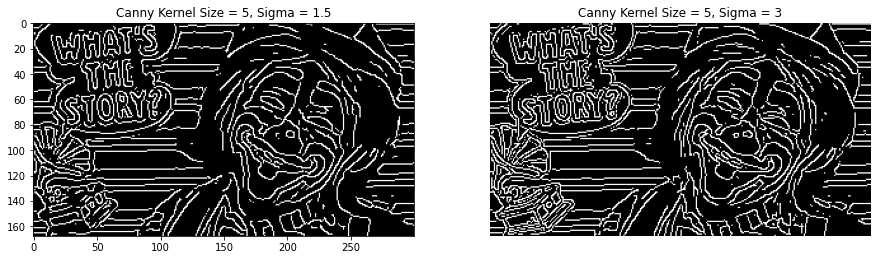

<IPython.core.display.Javascript object>

In [8]:
# Comparing the Canny output for Kernel Size 3 and Kernel Size 5

f, ax = plt.subplots(1,2)
plt.axis('off')

f.set_figheight(30)
f.set_figwidth(15)


ax[0].title.set_text("Canny Kernel Size = 5, Sigma = 1.5")
ax[0].imshow(img_canny_5, cmap="gray")

ax[1].title.set_text("Canny Kernel Size = 5, Sigma = 3")
ax[1].imshow(img_canny_5_3, cmap="gray")

plt.show()
